# **Tom vs Jerry Image Classification Using a Convolutional Neural Network**
---
**Module:** Machine Learning  
**Assessment:** Coursework 2  
**Student Name:** Sonja Nabiesade  
**Student ID:** NAB23614496  

---




## Project Overview

---

This project uses a **Convolutional Neural Network** (CNN) to classify images of Tom and Jerry using a public dataset of 3,187 labelled RGB images. The images were resized, normalised, and split into training and validation sets before being passed into the model.  

The CNN was trained to learn visual features in order to distinguish between the two characters. Model performance was evaluated using accuracy and loss curves, a confusion matrix, and precision, recall, and F1-score metrics. Additional enhancements such as dropout, data augmentation, and interactive image prediction were also implemented.

---


***Importing the Necessary Libraries***

In [ ]:
# File and folder handling
import os

# Core machine learning library
import tensorflow as tf

# High-level Keras API for building neural networks
from tensorflow import keras
from tensorflow.keras import layers

# Visualisation library for plotting graphs
import matplotlib.pyplot as plt

# Data handling and numerical operations
import numpy as np

# Evaluation metrics for model performance
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Connecting my Google Drive to this Colab Notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***Defining Image Size, Batch Size and Loading the Dataset***

In [ ]:
# Define the size to which all images will be resized
IMG_SIZE = (128, 128)

# Define how many images are processed at once during training.
BATCH_SIZE = 32

dataset_path = "/content/drive/MyDrive/Machine Learning/tom_and_jerry"

# Loading the training portion of the dataset (80%)
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=42, # Ensures the data split is the same each time (reproducibility)
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# Loading the validation portion of the dataset (20%)
val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)


In [ ]:
# Get class labels and display them.
class_names = train_ds.class_names
print("Class names:", class_names)

# Jerry = 0 and Tom = 1

Class names: ['jerry', 'tom']


In [ ]:
# Showing a sample of the data to check it isn't broken.
for images, labels in train_ds.take(1): # Take one batch of the data from training set
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)
    print("First 10 labels:", labels[:10].numpy())

    # 32 images, 128 x 128 pixels, 3 colour channels (RGB)
    # 32 labels
    # Prints tom or jerry

Image batch shape: (32, 128, 128, 3)
Label batch shape: (32,)
First 10 labels: [1 0 1 1 0 1 1 1 1 1]


***Normalising the Data***

In [ ]:
# Normalising all the images so pixel values are between 0 - 1
# Helps neural network train more efficiently
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# 0 stays 0, 255 becomes 1.

***Data Augmentation***

In [ ]:
# Apply data augmentation to generate modified versions of training images and reduce overfitting

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])


***Convolutional Neural Network Model***

In [ ]:
# Creating a sequential model so layers are applied strictly in order
model_aug = keras.Sequential([
    # Input image that is 128 pixels tall, 128 pixels wide, has RGB
    layers.Input(shape=(128, 128, 3)),

    data_augmentation,

    #  1st 2D convolution layer with 32 filters, size 3x3
    # Learns edges and corners
    layers.Conv2D(32, (3, 3), activation='relu'), # keeps positive values and changes negative ones to 0
    # 1st max pooling layer - reduces width & height by taking the max value
    layers.MaxPooling2D((2, 2)),

    # 2nd convolution layer - 64 filters
    # Learns more complex patterns and shapes
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Spatial size further reduced - important features kept
    layers.MaxPooling2D((2, 2)),

    # 3rd convolution layer
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten 3D map into 1D vector - numbers
    layers.Flatten(),

    # 128 neurons to combine feautures and make decisions
    layers.Dense(128, activation='relu'),

    # Randomly turns off 50% of neurons during training - reduce overfitting
    layers.Dropout(0.5),

    layers.Dense(1, activation='sigmoid') # Binary classification - so used sigmoid
])


In [ ]:
model_aug.compile(
    optimizer='adam', # smart auto correction system
    loss='binary_crossentropy',# compares the machines guess with true answer and penalises wrong answer
    metrics=['accuracy'] # measures sucess of model - how many predictions were correct
)


***Model Training***

In [ ]:
# Number of training cycles (full passes through the training dataset)
EPOCHS = 6

# Train the CNN model using the training dataset
# The model is evaluated on the validation dataset after each epoch
# Training progress (accuracy and loss) is stored in 'history_aug'
history_aug = model_aug.fit(
    train_ds,                 # Training images used to teach the model
    validation_data=val_ds,   # Validation images used to evaluate performance after each epoch
    epochs=EPOCHS             # Number of times the model sees the entire training dataset
)


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

***Model Performance Plots***

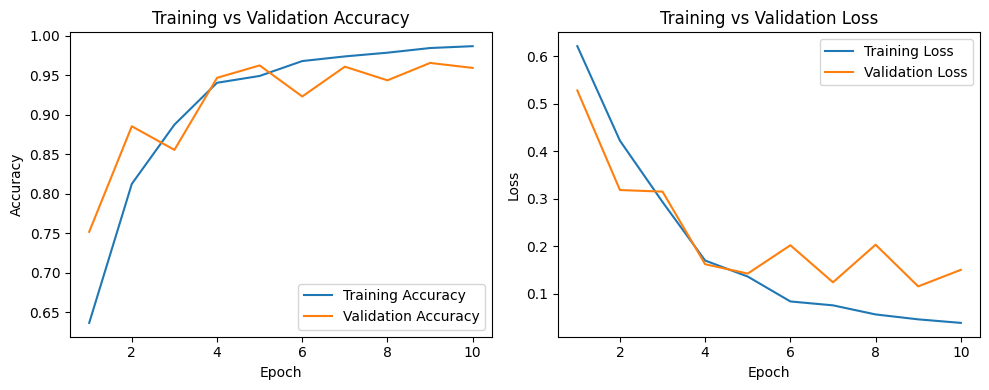

In [ ]:
# Extract accuracy and loss values from the training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Create x-axis values for the plots (epoch numbers)
epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(10, 4))

# Plot training vs validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')

# Plot training vs validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')

plt.tight_layout()
plt.show()



In [ ]:
# Collect true and predicted labels from the validation set for evaluation
y_true = []
y_pred = []

for images, labels in val_ds:
    predictions = model.predict(images)                 # Model gives probability outputs
    predictions = (predictions > 0.5).astype(int)       # Convert probabilities to class labels (0 or 1)
    y_true.extend(labels.numpy())                       # Store actual labels
    y_pred.extend(predictions.flatten())                # Store predicted labels

# Convert lists to numpy arrays for evaluation metrics
y_true = np.array(y_true)
y_pred = np.array(y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 891ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


***Confusion Matrix Evaluation***

In [ ]:
# Generate and display the confusion matrix to show correct and incorrect predictions for each class
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[228  23]
 [  3 383]]


***Precision, Recall, and F1-Score Evaluation***

In [ ]:
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))



Classification Report:
              precision    recall  f1-score   support

       jerry       0.99      0.91      0.95       251
         tom       0.94      0.99      0.97       386

    accuracy                           0.96       637
   macro avg       0.97      0.95      0.96       637
weighted avg       0.96      0.96      0.96       637



***Testing the Model on a New Image***

In [ ]:
# Function to load a single image, preprocess it, and predict whether it is Tom or Jerry
def predict_single_image(img_path):

    # Load the image from the given file path and resize it to match the model's expected input size
    img = tf.keras.utils.load_img(img_path, target_size=(128, 128))

    # Convert the image into a numerical array (pixel values)
    img_array = tf.keras.utils.img_to_array(img)

    # Normalise pixel values to 0–1, same as during training
    img_array = img_array / 255.0

    # Add a batch dimension so the input shape becomes (1, 128, 128, 3)
    img_array = np.expand_dims(img_array, axis=0)

    # Make a prediction using the trained model (output is a probability)
    prediction = model.predict(img_array)[0][0]

    # Convert the probability into a class label: 1 = Tom, 0 = Jerry
    class_index = int(prediction > 0.5)

    # Get the class name (string) based on the predicted index
    class_name = class_names[class_index]

    # Display the prediction result and probability
    print(f"Predicted class: {class_name}")
    print(f"Probability of 'tom' (class 1): {prediction:.3f}")


In [ ]:
# Choose a test image and run the prediction function to see whether the model identifies it as Tom or Jerry
test_img_path = "/content/drive/MyDrive/Machine Learning/tom_and_jerry/tom/frame14.jpg"
predict_single_image(test_img_path)



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: tom
Probability of 'tom' (class 1): 0.999


In [ ]:
# Test the model on another image (this time a Jerry image) to check if predictions generalise correctly
test_img_path = "/content/drive/MyDrive/Machine Learning/tom_and_jerry/jerry/frame12.jpg"
predict_single_image(test_img_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted class: jerry
Probability of 'tom' (class 1): 0.056
